# **Measures of center**

## **Mammal sleep data**

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

msleep = pd.read_csv('msleep.csv')
msleep

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.10,NaN,NaN,11.90,NaN,50.00
1,Owl monkey,Aotus,omni,Primates,NaN,17.00,1.80,NaN,7.00,0.02,0.48
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.40,2.40,NaN,9.60,NaN,1.35
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.90,2.30,0.13,9.10,0.00,0.02
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.00,0.70,0.67,20.00,0.42,600.00
...,...,...,...,...,...,...,...,...,...,...,...
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.90,2.60,0.23,15.10,0.00,0.10
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.20,NaN,NaN,18.80,NaN,173.33
80,Genet,Genetta,carni,Carnivora,NaN,6.30,1.30,NaN,17.70,0.02,2.00
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.50,NaN,NaN,11.50,0.04,3.38


## **Histograms**

7 mammals sleep 2-4 hours.

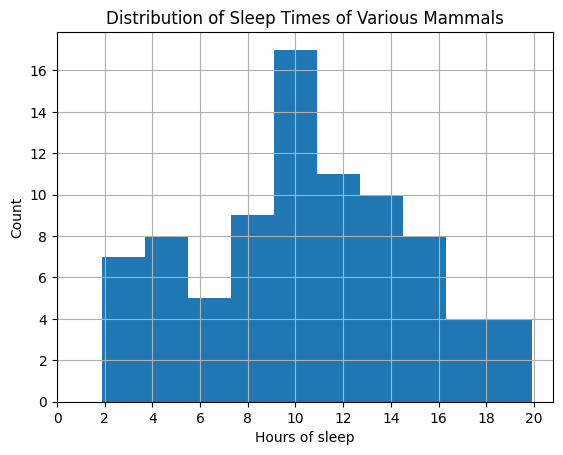

In [ ]:
msleep.hist(column='sleep_total')
plt.xticks(list(np.arange(0, 21, 2)), list(np.arange(0, 21, 2)))
plt.title('Distribution of Sleep Times of Various Mammals')
plt.xlabel('Hours of sleep')
plt.ylabel('Count')
plt.show()

## **How long do mammals in this dataset typically sleep?**

* Mean
* Median
* Mode



## **Mean**

In [ ]:
np.mean(msleep['sleep_total']), msleep['sleep_total'].mean()

(10.433734939759034, 10.433734939759034)

## **Median**

* The middle values out of 83 values.  

In [ ]:
np.median(msleep['sleep_total']), msleep['sleep_total'].sort_values().iloc[len(msleep['sleep_total'])//2]

(10.1, 10.1)

## **Mode**

The most frequent value

In [ ]:
msleep['sleep_total'].value_counts()

sleep_total
12.50    4
10.10    3
5.30     2
6.30     2
9.10     2
        ..
19.40    1
17.00    1
14.30    1
19.90    1
5.20     1
Name: count, Length: 65, dtype: int64

In [ ]:
msleep['vore'].value_counts()

vore
herbi      32
omni       20
carni      19
insecti     5
Name: count, dtype: int64

In [ ]:
import statistics

statistics.mode(msleep['vore'])

'herbi'

In [ ]:
statistics.mode(msleep['sleep_total'])

12.5

In [ ]:
msleep['sleep_total'].describe()

count   83.00
mean    10.43
std      4.45
min      1.90
25%      7.85
50%     10.10
75%     13.75
max     19.90
Name: sleep_total, dtype: float64

## **Adding an outlier**

In [ ]:
msleep[msleep['vore'] == 'insecti'][['name',	'genus',	'vore',	'order',	'sleep_total']]

,name,genus,vore,order,sleep_total
21,Big brown bat,Eptesicus,insecti,Chiroptera,19.70
42,Little brown bat,Myotis,insecti,Chiroptera,19.90
61,Giant armadillo,Priodontes,insecti,Cingulata,18.10
66,Eastern american mole,Scalopus,insecti,Soricomorpha,8.40
74,Short-nosed echidna,Tachyglossus,insecti,Monotremata,8.60


In [ ]:
msleep[msleep['vore'] == "insecti"]['sleep_total'].agg([np.mean, np.median])

mean     14.94
median   18.10
Name: sleep_total, dtype: float64

Let's say we discover a new insectivor mammal that never sleep.

In [ ]:
msleep = pd.read_csv('msleep.csv')
new_row = {
    'name': 'Mysterious insectivore',
    'genus': 'Mysteri',
    'vore': 'insecti',
    'order': 'Insectivora',
    'conservation': 'data deficient',
    'sleep_total': 0.0,
    'sleep_rem': 0.0,
    'sleep_cycle': None,
    'awake': 24.0,  # assuming it is awake all the time
    'brainwt': 0.003,  # assuming a small brain weight in kg
    'bodywt': 0.015  # assuming a small body weight in kg
}

new_row_df = pd.DataFrame([new_row])
msleep = pd.concat([msleep, new_row_df], ignore_index=True)
msleep[msleep['vore'] == 'insecti'][['name',	'genus',	'vore',	'order',	'sleep_total']]

,name,genus,vore,order,sleep_total
21,Big brown bat,Eptesicus,insecti,Chiroptera,19.70
42,Little brown bat,Myotis,insecti,Chiroptera,19.90
61,Giant armadillo,Priodontes,insecti,Cingulata,18.10
66,Eastern american mole,Scalopus,insecti,Soricomorpha,8.40
74,Short-nosed echidna,Tachyglossus,insecti,Monotremata,8.60
83,Mysterious insectivore,Mysteri,insecti,Insectivora,0.00


In [ ]:
msleep[msleep['vore'] == "insecti"]['sleep_total'].agg([np.mean, np.median])

mean     12.45
median   13.35
Name: sleep_total, dtype: float64

**Mean**: 14.9 $\rightarrow$ 12.5

**Median**: 18.1 $\rightarrow$ 13.4

Normally median is less sensitive to the outlier.  The example on datacamp excludes the last observation.

In [ ]:
msleep = pd.read_csv('msleep.csv').drop(index=74)
msleep[msleep['vore'] == "insecti"][['name',	'genus',	'vore',	'order',	'sleep_total']]

,name,genus,vore,order,sleep_total
21,Big brown bat,Eptesicus,insecti,Chiroptera,19.70
42,Little brown bat,Myotis,insecti,Chiroptera,19.90
61,Giant armadillo,Priodontes,insecti,Cingulata,18.10
66,Eastern american mole,Scalopus,insecti,Soricomorpha,8.40


In [ ]:
msleep[msleep['vore'] == "insecti"]['sleep_total'].agg([np.mean, np.median])

mean     16.52
median   18.90
Name: sleep_total, dtype: float64

In [ ]:
msleep = pd.read_csv('msleep.csv').drop(index=74)
new_row = {
    'name': 'Mysterious insectivore',
    'genus': 'Mysteri',
    'vore': 'insecti',
    'order': 'Insectivora',
    'conservation': 'data deficient',
    'sleep_total': 0.0,
    'sleep_rem': 0.0,
    'sleep_cycle': None,
    'awake': 24.0,  # assuming it is awake all the time
    'brainwt': 0.003,  # assuming a small brain weight in kg
    'bodywt': 0.015  # assuming a small body weight in kg
}

new_row_df = pd.DataFrame([new_row])
msleep = pd.concat([msleep, new_row_df], ignore_index=True)
msleep[msleep['vore'] == 'insecti'][['name',	'genus',	'vore',	'order',	'sleep_total']]

,name,genus,vore,order,sleep_total
21,Big brown bat,Eptesicus,insecti,Chiroptera,19.70
42,Little brown bat,Myotis,insecti,Chiroptera,19.90
61,Giant armadillo,Priodontes,insecti,Cingulata,18.10
66,Eastern american mole,Scalopus,insecti,Soricomorpha,8.40
82,Mysterious insectivore,Mysteri,insecti,Insectivora,0.00


In [ ]:
msleep[msleep['vore'] == "insecti"]['sleep_total'].agg([np.mean, np.median])

mean     13.22
median   18.10
Name: sleep_total, dtype: float64

**Mean**: 16.5 $\rightarrow$ 13.2

**Median**: 18.9 $\rightarrow$ 18.1

So the data used on the website was modified a little bit to convince that median is less sensitive to the outlier.  However, as number of observations increases, median is indeed less sensitive.

## **Skeewness**

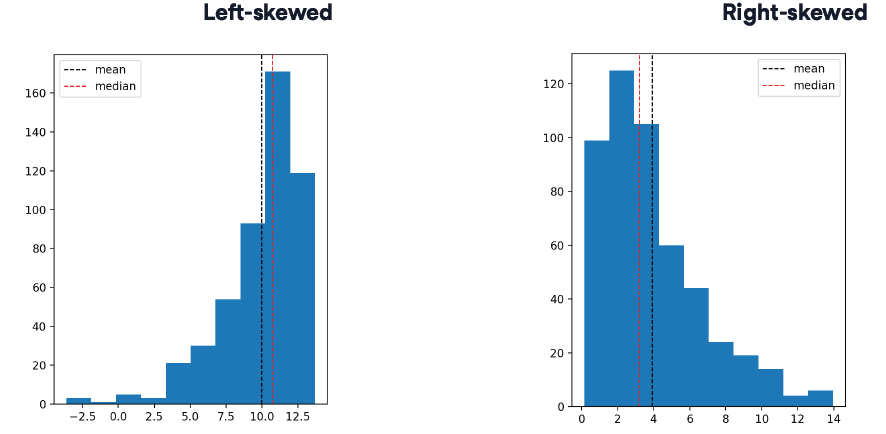

### ***Mean and median***

In this chapter, you'll be working with the [2018 Food Carbon Footprint Index](https://www.nu3.de/blogs/nutrition/food-carbon-footprint-index-2018) from nu3. The `food_consumption` dataset contains information about the kilograms of food consumed per person per year in each country in each food category (`consumption`) as well as information about the carbon footprint of that food category (`co2_emissions`) measured in kilograms of carbon dioxide, or $CO_2$, per person per year in each country.

* Create two DataFrames: one that holds the rows of `food_consumption` for `'Belgium'` and another that holds rows for `'USA'`. Call these `be_consumption` and `usa_consumption`.
* Calculate the mean and median of kilograms of food consumed per person per year for both countries.

In [ ]:
import numpy as np
import pandas as pd

food_consumption = pd.read_csv('food_consumption.csv').drop(columns='Unnamed: 0')

# Filter for Belgium
be_consumption = food_consumption[food_consumption['country']=='Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country']=='USA']

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))


42.13272727272727
12.59
44.650000000000006
14.58


* Subset `food_consumption` for rows with data about Belgium and the USA.

* Group the subsetted data by `country` and select only the consumption column.

* Calculate the mean and median of the kilograms of food consumed per person per year in each country using `.agg()`.

In [ ]:
# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == 'Belgium') | (food_consumption['country'] == 'USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


 When you want to compare summary statistics between groups, it's much easier to use **`.groupby()`** and **`.agg()`** instead of subsetting and calling the same functions multiple times.

### ***Mean vs. median***

In the video, you learned that the mean is the sum of all the data points divided by the total number of data points, and the median is the middle value of the dataset where 50% of the data is less than the median, and 50% of the data is greater than the median. In this exercise, you'll compare these two measures of center.

* Subset `food_consumption` to get the rows where `food_category` is `'rice'`.
* Create a histogram of `co2_emission` for `rice` and show the plot.
* Use **`.agg()`** to calculate the mean and median of `co2_emission` for `rice`.

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


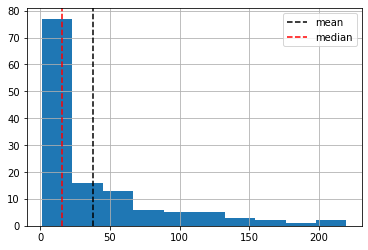

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

food_consumption = pd.read_csv('food_consumption.csv').drop(columns='Unnamed: 0')


# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
rice_consumption['co2_emission'].hist()


# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg([np.mean, np.median]))
plt.axvline(x=37.591615, linestyle='--', label='mean', color='black')
plt.axvline(x=15.200000, linestyle='--', label='median', color='red')
plt.legend()
plt.show()

# **Variance**

$$var(x) = \frac{\displaystyle\sum_{i=1}^n(x_i-\bar x)^2}{n-1}$$

In [ ]:
np.var(msleep['sleep_total'], ddof=1)

21.081398765794887

# **Standard Deviation**

In [ ]:
np.std(msleep['sleep_total'], ddof=1)

4.591448438760353

# **Mean absolute deviation**

In [ ]:
dists = msleep['sleep_total'] - np.mean(msleep['sleep_total'])
np.mean(np.abs(dists))

3.6632602699956456

## **Standard deviation vs. mean absolute deviation**

* Standard deviation squares distances, penalizing longer distances more than shorter ones.
* Mean absolute deviation penalizes each distance equally.

# **Quantiles**

In [ ]:
np.quantile(msleep['sleep_total'], 0.5)

10.1

In [ ]:
np.quantile(msleep['sleep_total'], [0, 0.25, 0.5, 0.75, 1])

array([ 0.  ,  7.35, 10.1 , 13.75, 19.9 ])

## **Boxplots use quartiles**

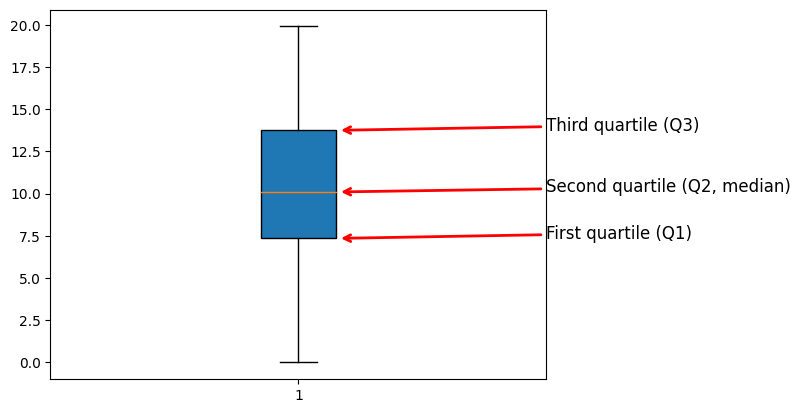

In [ ]:
# plt.boxplot(msleep['sleep_total'])
# plt.show()
boxplot = plt.boxplot(msleep['sleep_total'], vert=True, patch_artist=True)

plt.annotate(
    'Third quartile (Q3)',
    xy=(1 + 0.08, np.quantile(msleep['sleep_total'], 0.75)),
    xytext=(1 + 0.5, np.quantile(msleep['sleep_total'], 0.75)), # Text location
    arrowprops=dict(arrowstyle='->', color='red', lw=2), # Arrow properties
    fontsize=12,           # Font size of the text
    color='black'            # Color of the text
)

plt.annotate(
    'Second quartile (Q2, median)',
    xy=(1 + 0.08, np.quantile(msleep['sleep_total'], 0.5)),
    xytext=(1 + 0.5, np.quantile(msleep['sleep_total'], 0.5)), # Text location
    arrowprops=dict(arrowstyle='->', color='red', lw=2), # Arrow properties
    fontsize=12,           # Font size of the text
    color='black'            # Color of the text
)

plt.annotate(
    'First quartile (Q1)',
    xy=(1 + 0.08, np.quantile(msleep['sleep_total'], 0.25)),
    xytext=(1 + 0.5, np.quantile(msleep['sleep_total'], 0.25)), # Text location
    arrowprops=dict(arrowstyle='->', color='red', lw=2), # Arrow properties
    fontsize=12,           # Font size of the text
    color='black'            # Color of the text
)

plt.show()

## **Interquartile range (IQR)**
Height of the box in a boxplot

In [ ]:
np.quantile(msleep['sleep_total'], 0.75) - np.quantile(msleep['sleep_total'], 0.25)

6.4

In [ ]:
from scipy.stats import iqr

iqr(msleep['sleep_total'])

6.4

## **Outliers**

* data < $Q1 − 1.5 × \text{IQR}$ or
* data > $Q3 + 1.5 × \text{IQR}$

## **Finding outliers**

In [ ]:
from scipy.stats import iqr

iqr = iqr(msleep['bodywt'])
lower_threshold = np.quantile(msleep['bodywt'], 0.25) - 1.5 * iqr
upper_threshold = np.quantile(msleep['bodywt'], 0.75) + 1.5 * iqr

msleep[(msleep['bodywt'] < lower_threshold) | (msleep['bodywt'] > upper_threshold)][['name', 'vore', 'sleep_total', 'bodywt']]

,name,vore,sleep_total,bodywt
4,Cow,herbi,4.00,600.00
20,Asian elephant,herbi,3.90,"2,547.00"
22,Horse,herbi,2.90,521.00
23,Donkey,herbi,3.10,187.00
29,Giraffe,herbi,1.90,900.00
30,Pilot whale,carni,2.70,800.00
35,African elephant,herbi,3.30,"6,654.00"
50,Tiger,carni,15.80,162.56
52,Lion,carni,13.50,161.50
75,Brazilian tapir,herbi,4.40,207.50


## **`.describe()`**

In [ ]:
msleep['bodywt'].describe()

count      83.00
mean      166.08
std       786.85
min         0.01
25%         0.14
50%         1.62
75%        41.75
max     6,654.00
Name: bodywt, dtype: float64

### ***Quartiles, quantiles, and quintiles***

Quantiles are a great way of summarizing numerical data since they can be used to measure center and spread, as well as to get a sense of where a data point stands in relation to the rest of the data set. For example, you might want to give a discount to the 10% most active users on a website.

In this exercise, you'll calculate quartiles, quintiles, and deciles, which split up a dataset into 4, 5, and 10 pieces, respectively.

* Calculate the quartiles of the `co2_emission` column of `food_consumption`.

* Calculate the six quantiles that split up the data into 5 pieces (quintiles) of the `co2_emission` column of `food_consumption`.

* Calculate the eleven quantiles of `co2_emission` that split up the data into ten pieces (deciles).

In [ ]:
import numpy as np
import pandas as pd

food_consumption = pd.read_csv('food_consumption.csv').drop(columns='Unnamed: 0')

# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 5)))

# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 6)))

# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 11)))

[   0.        5.21     16.53     62.5975 1712.    ]
[   0.       3.54    11.026   25.59    99.978 1712.   ]
[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


While calculating more quantiles gives you a more detailed look at the data, it also produces more numbers, making the summary more difficult to quickly understand.

### ***Variance and standard deviation***

***Variance*** and ***standard deviation*** are two of the most common ways to measure the spread of a variable. Spread is important since it can help inform expectations. For example, if a salesperson sells a mean of 20 products a day, but has a standard deviation of 10 products, there will probably be days where they sell 40 products, but also days where they only sell one or two. Information like this is important, especially when making predictions.

* Calculate the variance and standard deviation of `co2_emission` for each `food_category` by grouping and aggregating.
* Create a histogram of `co2_emission` for the beef `food_category`.
* Create a histogram of `co2_emission` for the eggs `food_category`.

                    var    std
food_category                 
beef          88,748.41 297.91
dairy         17,671.89 132.94
eggs              21.37   4.62
fish             921.64  30.36
lamb_goat     16,475.52 128.36
nuts              35.64   5.97
pork           3,094.96  55.63
poultry          245.03  15.65
rice           2,281.38  47.76
soybeans           0.88   0.94
wheat             71.02   8.43


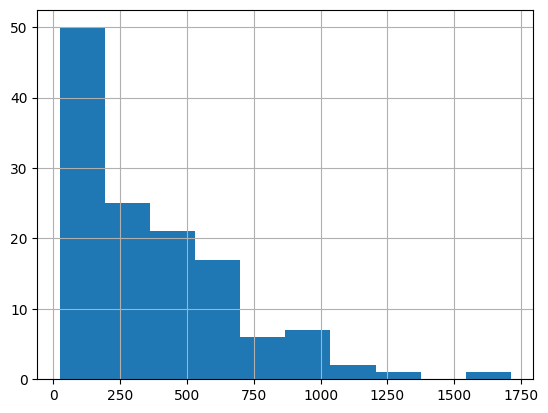

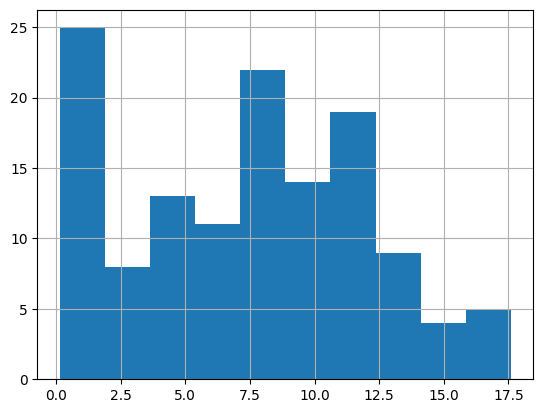

In [ ]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category']=='beef']['co2_emission'].hist()
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category']=='eggs']['co2_emission'].hist()
# Show plot
plt.show()

Beef has the largest amount of variation in its CO2 emissions, while eggs have a relatively small amount of variation.

### ***Finding outliers using IQR***

Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. IQR is also often used to find outliers. If a value is less than  $Q1-1.5\times IQR$ or greater than $Q3+1.5\times IQR$, it's considered an outlier. In fact, this is how the lengths of the whiskers in a matplotlib box plot are calculated.

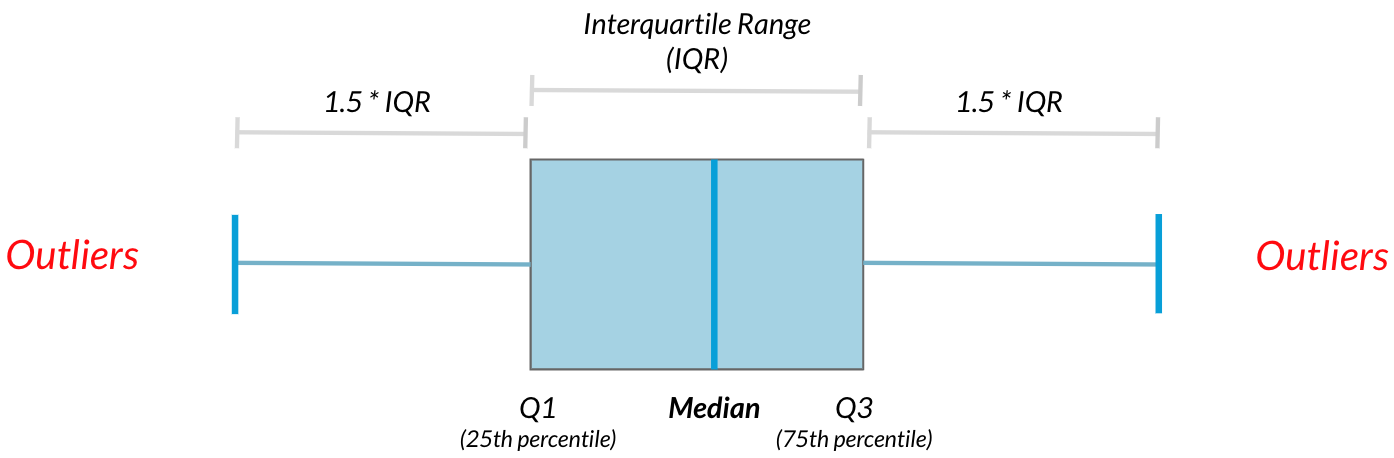

* Calculate the total `co2_emission` per country by grouping by country and taking the sum of `co2_emission`. Store the resulting DataFrame as `emissions_by_country`.

* Compute the first and third quartiles of `emissions_by_country` and store these as `q1` and `q3`.
* Calculate the interquartile range of `emissions_by_country` and store it as `iqr`.
* Calculate the lower and upper cutoffs for outliers of `emissions_by_country`, and store these as `lower` and `upper`.
* Subset `emissions_by_country` to get countries with a total emission greater than the `upper` cutoff or a total emission less than the `lower` cutoff.

In [ ]:
import numpy as np
import pandas as pd

food_consumption = pd.read_csv('food_consumption.csv').drop(columns='Unnamed: 0')

# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


 It looks like Argentina has a substantially higher amount of CO2 emissions per person than other countries in the world.

 # **Sampling from a DataFrame**

In [ ]:
from io import StringIO

data = '''
name, n_sales
Amir, 178
Brian, 128
Claire, 75
Damian, 69
'''

sales_counts = pd.read_csv(StringIO(data))
sales_counts

,name,n_sales
0,Amir,178
1,Brian,128
2,Claire,75
3,Damian,69


In [ ]:
sales_counts.sample()

,name,n_sales
0,Amir,178


In [ ]:
# Choose randomly
sales_counts.sample()

,name,n_sales
1,Brian,128


## **Setting a random seed**

Setting this makes replication possible.



```
np.random.seed()
```



## **Sampling without replacement**

* Dependent events

In [ ]:
sales_counts.sample(3)

,name,n_sales
1,Brian,128
2,Claire,75
3,Damian,69


## **Sampling with replacement**

* Independent event

In [ ]:
sales_counts.sample(7, replace = True)

,name,n_sales
3,Damian,69
1,Brian,128
2,Claire,75
1,Brian,128
0,Amir,178
1,Brian,128
1,Brian,128




# ***Sampling with/without replacement in Python***

`df.counts.sample(5, replace=True)`

### ***Calculating probabilities***

You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.

Recall that the probability of an event can be calculated by

 $$Prob(\text{event}) = \frac{\text{# ways event can happen}}{\text{total # of possible outcomes}}$$


* Count the number of deals Amir worked on for each `product` type and store in `counts`.
* Calculate the probability of selecting a deal for the different product types by dividing the counts by the total number of deals Amir worked on. Save this as `probs`.

In [ ]:
import numpy as np
import pandas as pd

amir_deals = pd.read_csv('amir_deals.csv').drop(columns='Unnamed: 0')

# Count the deals for each product
counts = amir_deals['product'].value_counts()

# Calculate probability of picking a deal with each product
probs = counts / len(amir_deals)
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


### ***Sampling deals***
Randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.


* Set the random seed to `24`.
* Take a sample of `5` deals ***without*** replacement and store them as `sample_without_replacement`.
* Take a sample of 5 deals with replacement and save as `sample_with_replacement`.

In [ ]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

       product   client status   amount  num_users
127  Product B  Current    Won  2070.25          7
148  Product D  Current    Won  3485.48         52
77   Product B  Current    Won  6252.30         27
104  Product D  Current    Won  4110.98         39
166  Product C      New   Lost  3779.86         11
       product   client status   amount  num_users
162  Product D  Current    Won  6755.66         59
131  Product B  Current    Won  6872.29         25
87   Product C  Current    Won  3579.63          3
145  Product A  Current    Won  4682.94         63
145  Product A  Current    Won  4682.94         63


# **Discrete Distributions**

* Expected Values: $EX = \displaystyle\sum_{i=1}^n x_i\cdot f(x_i)$

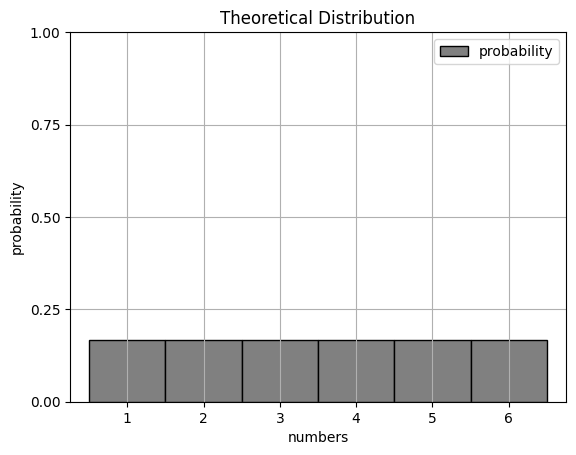

In [ ]:
fair_die = pd.DataFrame(data={'numbers':[1, 2, 3, 4, 5, 6], 'probability': [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]})
fair_die.plot(kind='bar', x='numbers', y='probability', grid=True, width=1, edgecolor='black', color='gray', rot=0)
plt.ylabel('probability')
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.title("Theoretical Distribution")
plt.show()

In [ ]:
print(fair_die)

   numbers  probability
0        1         0.17
1        2         0.17
2        3         0.17
3        4         0.17
4        5         0.17
5        6         0.17


In [ ]:
np.mean(fair_die['numbers'])

3.5

In [ ]:
rolls_10 = fair_die.sample(10, replace=True)
rolls_10

,numbers,probability
0,1,0.17
0,1,0.17
5,6,0.17
1,2,0.17
4,5,0.17
0,1,0.17
0,1,0.17
2,3,0.17
0,1,0.17
4,5,0.17


## **Visualizing a sample**

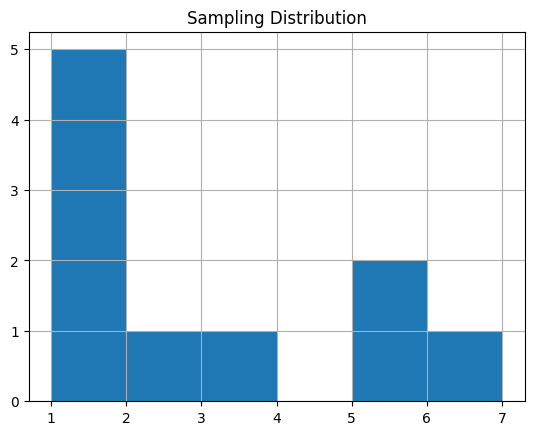

In [ ]:
rolls_10['numbers'].hist(bins=np.linspace(1,7,7))
plt.title('Sampling Distribution')
plt.show()

In [ ]:
np.mean(rolls_10['numbers']) # far from theoretical EX

2.6

## **Laws of Large Numbers**

As the size of your sample increases, the sample mean will approach the expected value.

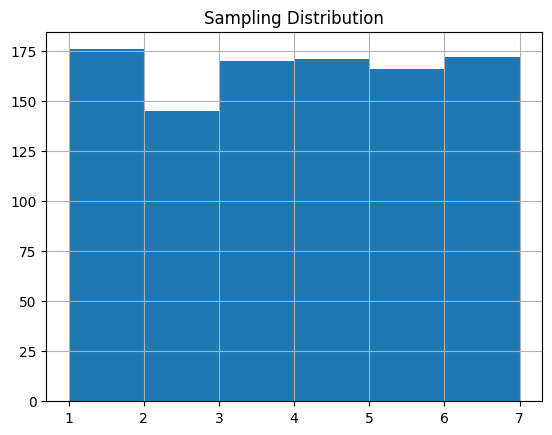

In [ ]:
rolls_1000 = fair_die.sample(1000, replace=True)
rolls_1000['numbers'].hist(bins=np.linspace(1,7,7))
plt.title('Sampling Distribution')
plt.show()


In [ ]:
np.mean(rolls_1000['numbers']) # Close to 3.5

3.522

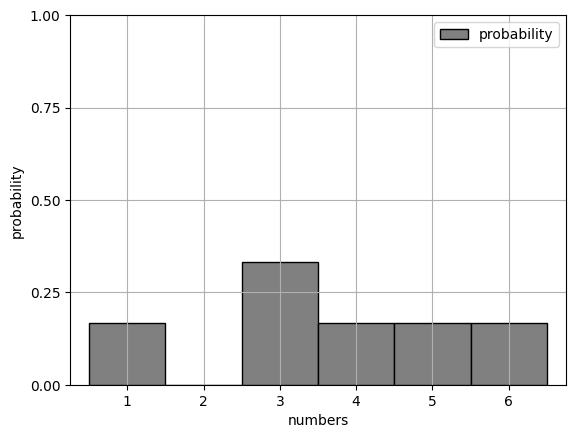

In [ ]:
uneven_die = pd.DataFrame(data={'numbers':[1, 2, 3, 4, 5, 6], 'probability': [1/6, 0, 1/3, 1/6, 1/6, 1/6]})
uneven_die.plot(kind='bar', x='numbers', y='probability', grid=True, width=1, edgecolor='black', color='gray', rot=0)
plt.ylabel('probability')
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.show()



### ***Creating a probability distribution***

A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly. In this exercise, you'll investigate the probability of groups of different sizes getting picked first. Data on each of the ten groups is contained in the `restaurant_groups` DataFrame.

Remember that expected value can be calculated by multiplying each possible outcome with its corresponding probability and taking the sum.

* Create a histogram of the `group_size` column of `restaurant_groups`, setting bins to `[2, 3, 4, 5, 6]`.

* Count the number of each `group_size` in `restaurant_groups`, then divide by the number of rows in `restaurant_groups` to calculate the probability of randomly selecting a group of each size. Save as `size_dist`.
* Reset the index of `size_dist`.
* Rename the columns of `size_dist` to `group_size` and prob.

* Calculate the expected value of the `size_distribution`, which represents the expected group size, by multiplying the `group_size` by the prob and taking the sum.

* Calculate the probability of randomly picking a group of 4 or more people by subsetting for groups of size 4 or more and summing the probabilities of selecting those groups.

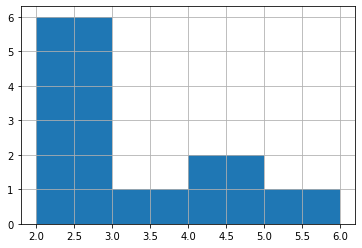

0.30000000000000004


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


restaurant_groups = pd.DataFrame(data = {'group_id':['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], 'group_size': [2, 4, 6, 2, 2, 2, 3, 2, 4, 2]})

restaurant_groups['group_size'].hist(bins=[2., 3., 4., 5., 6.])
plt.show()

# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more['prob'])
print(prob_4_or_more)

# **Continuous Distribution**
## **Uniform Distribution**

```
uniform.cdf(X, lower, upper)
```

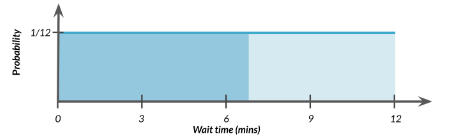

In [ ]:
from scipy.stats import uniform

uniform.cdf(7, 0, 12)

0.5833333333333334

## **"Greater than" probabilities**

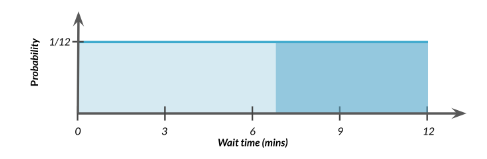

In [ ]:
from scipy.stats import uniform

1 - uniform.cdf(7, 0, 12)

0.41666666666666663

## **"Between" Probabilities**

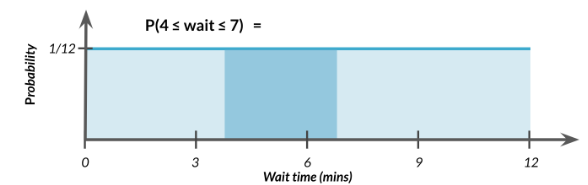

In [ ]:
from scipy.stats import uniform

uniform.cdf(7, 0, 12) - uniform.cdf(4, 0, 12)

0.25000000000000006

## **Generating random numbers according to uniform distribution**

```
uniform.rvs(lower, upper, size)
```

In [ ]:
from scipy.stats import uniform

uniform.rvs(0, 5, size=10)

array([0.97100655, 0.82321862, 2.89430482, 0.34175146, 3.57258534,
       3.47210543, 1.79849962, 0.42032047, 2.36320145, 2.32404784])



### ***Data back-ups***

The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.

* To model how long Amir will wait for a back-up using a continuous uniform distribution, save his lowest possible wait time as `min_time` and his longest possible wait time as `max_time`. Remember that back-ups happen every `30` minutes.

* Import `uniform` from `scipy.stats` and calculate the probability that Amir has to wait less than 5 minutes, and store in a variable called `prob_less_than_5`.

* Calculate the probability that Amir has to wait more than 5 minutes, and store in a variable called `prob_greater_than_5`.
4
Calculate the probability that Amir has to wait between 10 and 20 minutes, and store in a variable called `prob_between_10_and_20`.

In [ ]:
from scipy.stats import uniform

# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(prob_less_than_5)

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, min_time, max_time)
print(prob_greater_than_5)

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print(prob_between_10_and_20)

0.16666666666666666
0.8333333333333334
0.3333333333333333


There's a 33% chance that Amir will wait 10-20 minutes. In the next exercise, you'll make sure this calculation holds up by simulating some wait times.

### ***Simulating wait times***

To give Amir a better idea of how long he'll have to wait, you'll simulate Amir waiting 1,000 times and create a histogram to show him what he should expect. Recall from the last exercise that his minimum wait time is 0 minutes and his maximum wait time is 30 minutes.

* Set the random seed to `334`.
* Generate 1,000 wait times from the continuous uniform distribution that models Amir's wait time. Save this as `wait_times`.
* Create a histogram of the simulated wait times.

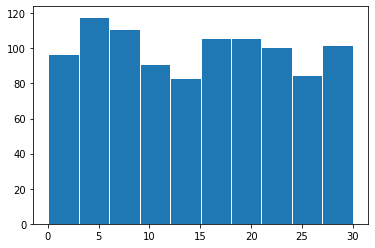

In [ ]:
from scipy.stats import uniform

# Set random seed to 334
np.random.seed(334)

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times, edgecolor='white')
plt.show()

Unless Amir figures out exactly what time each backup happens, he won't be able to time his data entry so it gets backed up sooner, but it looks like he'll wait about 15 minutes on average.

# ***Binomial Distribution (Each experiment must be independent to each other)*** -- Cannot be used with sampling without replacement

* $n$: total number of trials
* $p$: probability of success

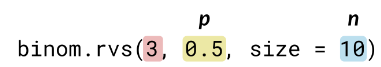

## *This is probably the mistakes.  The QuantEcon lectures show otherwise*

```
n = 10
p = 0.5
u = scipy.stats.binom(n, p)
```

```
from scipy.stats import binom
binom.rvs(1, 0.5, size=1)

binom.rvs(# of coins, probability of heads/success, size=# of trials)
```

$p$: the probability of success must be defined.  Since $p=\frac{1}{2}$, it can be either heads or tails.

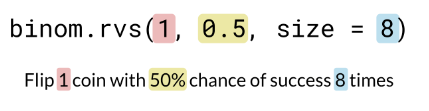

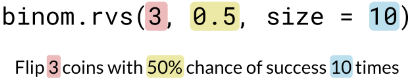

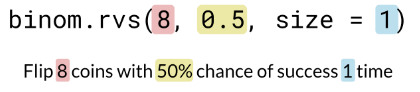

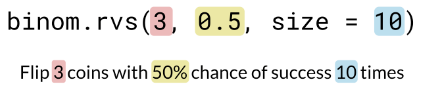

In [ ]:
from scipy.stats import binom

for coin, size in zip([1, 1, 3, 8, 3], [1, 8, 10, 1, 10]):
    print(binom.rvs(coin, 0.5, size=size))

[1]
[0 0 1 1 0 1 1 1]
[1 1 2 1 0 0 1 2 3 2]
[5]
[2 2 1 0 0 2 1 1 1 2]


## **Biased coins**

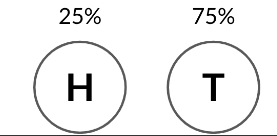

In [ ]:
binom.rvs(3, 0.25, size=10)

array([2, 0, 2, 0, 1, 1, 0, 1, 0, 2])

## *The above is probably inconsistent with general knowledge as follows*

## **Parameters of binom.rvs**
Here are the key parameters of the binom.rvs function:

* `n` (first argument): The number of trials or experiments. This parameter indicates how many times the binary experiment (e.g., flipping a coin, success/failure experiment) is repeated.

* `p` (second argument): The probability of success on each trial. This value should be between 0 and 1.

* `size` (optional argument): The number of random variates (samples) to generate. If size is None, a single value is returned. If size is an integer or a tuple, it specifies the output shape.

### *Examples*
* `n=10`: This means we are conducting 10 trials for each sample. Each trial is an independent experiment.
* `p=0.3`: Each trial has a 30% chance of success.
* `size=5`: We want to generate 5 samples from this binomial distribution.

### *Interpretation*

For example, if results is `[2, 4, 3, 1, 0]`, it means:

- In the first sample, there were 2 successes out of 10 trials.
- In the second sample, there were 4 successes out of 10 trials.
- And so on for the remaining samples.

## **Mean = $np$**

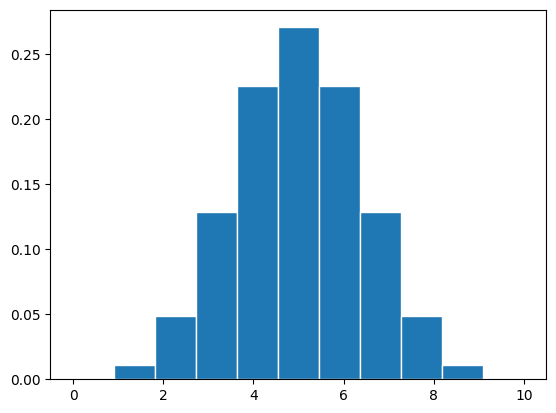

In [ ]:
plt.hist(binom.rvs(10, 0.5, size=int(10e7)), edgecolor='white', density=True, bins=11)
plt.show()


$n p = 10 \cdot \frac{1}{2} = 5$

# ***What's the probability of exactly 7 heads?***

$$p(i) = \binom{n}{i} \theta^i (1-\theta)^{n-i}$$

$$Prob(\text{heads}=7) = \binom{10}{7} \left(\frac{1}{2}\right)^7 \left(1-\frac{1}{2}\right)^{10-7}$$



In [ ]:
from math import factorial

factorial(10)/factorial(7)/factorial(3) * (1/2)**7 * (1-1/2)**(10-7)

0.1171875

In [ ]:
# binom.pmf(# heads, # trials, prob of heads)
binom.pmf(7, 10, 0.5)

0.11718750000000014

# ***What's the probability of 7 or fewer heads?***


$$Prob(\text{heads} \leq 7)$$

In [ ]:
print(binom.cdf(7, 10, 0.5))

prob = 0
for i in range(1, 8):
    prob += factorial(10)/factorial(i)/factorial(10-i) * (1/2)**i * (1-1/2)**(10-i)
print(prob)

0.9453125
0.9443359375


## **What's the probability of more than 7 heads?**

$$P(heads > 7)$$

In [ ]:
1 - binom.cdf(7, 10, 0.5)

0.0546875

# ***Expected value of Binomial Distribution***

$$X \sim  Bin(n, p) \Longrightarrow E(X) = np$$

### ***Simulating sales deals***

Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a ***binomial distribution***. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.

* Import binom from scipy.stats and set the random seed to 10.

* Simulate 1 deal worked on by Amir, who wins 30% of the deals he works on.

* Simulate a typical week of Amir's deals, or one week of 3 deals.

* Simulate a year's worth of Amir's deals, or 52 weeks of 3 deals each, and store in deals.


In [ ]:
from scipy.stats import binom
import numpy as np

# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))

# Simulate 1 week of 3 deals
print(binom.rvs(3, 0.3, size=1))

# Simulate 1 week of 3 deals
print(binom.rvs(3, 0.3, size=1))

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size=52)

# Print mean deals won per week
print(np.mean(deals))

[1]
[0]
[1]
0.8461538461538461


### ***Calculating binomial probabilities***

Just as in the last exercise, assume that Amir wins 30% of deals. He wants to get an idea of how likely he is to close a certain number of deals each week. In this exercise, you'll calculate what the chances are of him closing different numbers of deals using the binomial distribution.

* What's the probability that Amir closes all 3 deals in a week? Save this as `prob_3`.

* What's the probability that Amir closes 1 or fewer deals in a week? Save this as `prob_less_than_or_equal_1`.

* What's the probability that Amir closes more than 1 deal? Save this as `prob_greater_than_1`.

In [ ]:
from scipy.stats import binom
import numpy as np

# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)

print(prob_3)

# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)

print(prob_less_than_or_equal_1)

# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)

print(prob_greater_than_1)

0.026999999999999982
0.7839999999999999
0.21600000000000008


 Amir has about a 22% chance of closing more than one deal in a week.

### ***How many sales will be won?***

Now Amir wants to know how many deals he can expect to close each week if his win rate changes. Luckily, you can use your binomial distribution knowledge to help him calculate the expected value in different situations. Recall that the expected value of a binomial distribution can be calculated by $n\times p$.

* Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate.

* Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate drops to 25%.

* Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate rises to 35%.

In [ ]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


If Amir's win rate goes up by 5%, he can expect to close more than 1 deal on average each week.

# **NORMAL DISTRIBUTION**

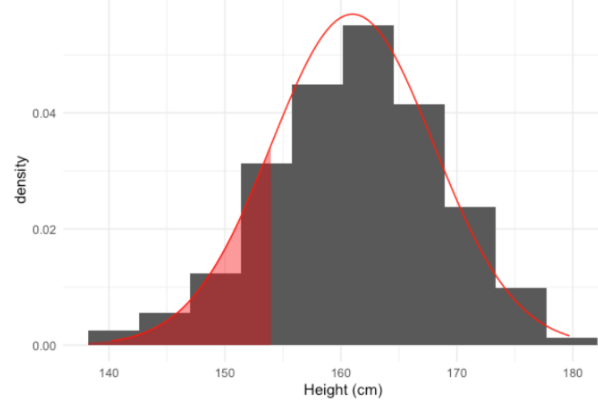

```
norm.cdf(x, mean, sd)
```

In [ ]:
from scipy.stats import norm

norm.cdf(154, 161, 7)

0.15865525393145707

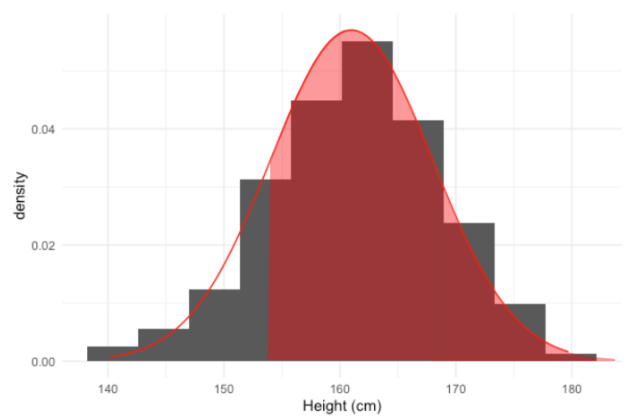

In [ ]:
from scipy.stats import norm

1 - norm.cdf(154, 161, 7)

0.8413447460685429

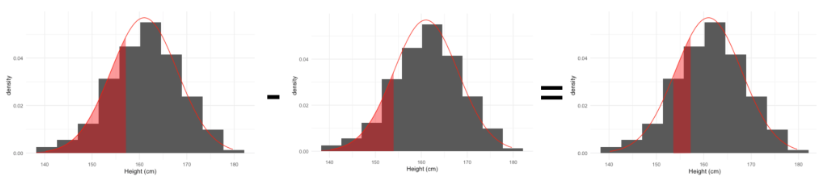

In [ ]:
norm.cdf(157, 161, 7) - norm.cdf(154, 161, 7)

0.1251993291672192

## **`scipy.stats.norm.ppf`**

 The *inverse* of the cumulative distribution function

**`scipy.stats.norm.ppf(q, loc=0, scale=1)`**

* `q`: The <u>quantile</u> at which you want to find the corresponding value of the normal distribution.
* `loc`: Mean (or average) of the normal distribution. Default is 0.
* `scale`: Standard deviation of the normal distribution. Default is 1.

Returns the value $x$ such that $P(X \leq x) = q$

## What height are 90% of women shorter than?

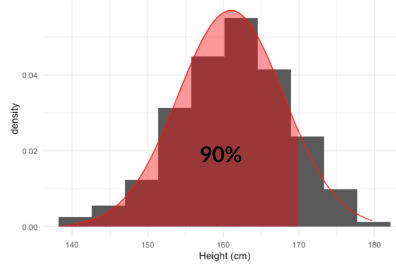

In [ ]:
norm.ppf(0.9, 161, 7)

169.9708609588122

## What height are 90% of women taller than?

In [ ]:
norm.ppf((1-0.9), 161, 7)

152.0291390411878

## **Generating random normal variables**

In [ ]:
norm.rvs(161, 7, size=10)

array([168.616626  , 161.66031241, 151.03309571, 157.91801547,
       158.23862028, 154.30248164, 155.99218523, 177.66686108,
       143.26703385, 156.83547614])



### ***Distribution of Amir's sales***

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of `amir_deals` As part of Amir's performance review, you want to be able to estimate the probability of him selling different amounts, but before you can do this, you'll need to determine what kind of distribution the amount variable follows.

* Create a histogram with `10` bins to visualize the distribution of the amount.

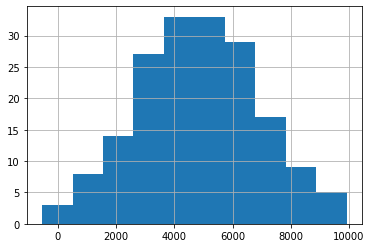

In [ ]:
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

amir_deals = pd.read_csv('amir_deals.csv').drop(columns='Unnamed: 0')

# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins=10)
plt.show()

Now that you've visualized the data, you know that you can approximate probabilities of different amounts using the normal distribution.

### ***Probabilities from the normal distribution***

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the `amount` column of `amir_deals` and follow a normal distribution with a mean of 5,000 dollars and a standard deviation of 2,000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.

* What's the probability of Amir closing a deal worth less than $7,500?

* What's the probability of Amir closing a deal worth more than $1,000?

* What's the probability of Amir closing a deal worth between $3,000 and $7,000?

* What amount will 25% of Amir's sales be less than?


In [ ]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)

print(prob_less_7500)

# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)

print(prob_over_1000)

# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)

print(prob_3000_to_7000)

# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)

print(pct_25)

0.8943502263331446
0.9772498680518208
0.6826894921370859
3651.0204996078364


You know that you can count on Amir 75% (1-0.25) of the time to make a sale worth at least $3,651.02. This information could be useful in making company-wide sales projections.

### ***Simulating sales under new market conditions***

The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution and store these in the `new_sales` DataFrame.

* Currently, Amir's average sale amount is $5,000. Calculate what his new average amount will be if it increases by 20% and store this in `new_mean`.

* Amir's current standard deviation is $2,000. Calculate what his new standard deviation will be if it increases by 30% and store this in `new_sd`.

* Create a variable called `new_sales`, which contains 36 simulated amounts from a normal distribution with a mean of `new_mean` and a standard deviation of `new_sd`.

* Plot the distribution of the `new_sales` amounts using a histogram and show the plot.

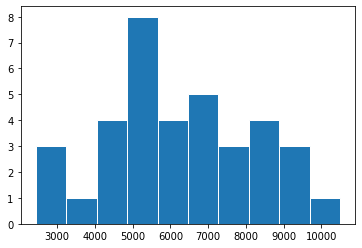

0.9772498680518208
0.9727648049862613


In [ ]:
# Calculate new average amount
new_mean = 5000 * 1.2

# Calculate new standard deviation
new_sd = 2000 * 1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size=36)

# Create histogram and show
plt.hist(new_sales, edgecolor='white')
plt.show()

# ร้อยละของรายการการขายที่ขายได้มากกว่า 1,000
print(1 - norm.cdf(1000, 5000, 2000))
print(1 - norm.cdf(1000, new_mean, new_sd))

Although the average sale amount went up, the variation also increased, so it's not straightforward to decide whether these sales are better than his current ones.  Amir makes sales over $1,000 about 97.7% of the time, and about 97.3% of the time in the predicted market, so there's not much of a difference. However, his average sale amount is higher in the predicted market, so your company may want to consider other metrics as well.

### **Which market is better?**

The key metric that the company uses to evaluate salespeople is the percent of sales they make over $\$1,000$ since the time put into each sale is usually worth a bit more than that, so the higher this metric, the better the salesperson is performing.

Recall that Amir's current sales amounts have a mean of $\$5,000$ and a standard deviation of $\$2,000$, and Amir's predicted amounts in next quarter's market have a mean of $\$6,000$ and a standard deviation of $\$2,600$.

Using **`scipy.stats.norm`** to answer the following: Based only on the metric of percent of sales over $\$1,000$, does Amir perform better in the current market or the predicted market?

In [ ]:
print(f'Percent of sales over 1,000 in current market is {(1 - norm.cdf(1000, 5000, 2000)) * 100:.1f}.')
print(f'Percent of sales over 1,000 in predicted market is {(1 - norm.cdf(1000, 6000, 2600)) * 100:.1f}.')

Percent of sales over 1,000 in current market is 97.7.
Percent of sales over 1,000 in predicted market is 97.3.


In the current market, Amir makes sales over $\$1,000$ about 97.7% of the time, and about 97.3% of the time in the predicted market, so there's not much of a difference. However, his average sale amount is higher in the predicted market, so your company may want to consider other metrics as well.

# **CENTRAL LIMIT THEOREM**

* **The sampling distribution of <u>a statistic</u> (means, standard deviations, variances, etc.) becomes closer to the normal distribution as the
number of trials increases.**

## Rolling the dice 5 times



In [ ]:
die = pd.Series([1, 2, 3, 4, 5, 6])

# Roll 5 times
samp_5 = die.sample(5, replace=True)
print(samp_5.values)
print(np.mean(samp_5))

[6 4 3 5 6]
4.8


In [ ]:
samp_5 = die.sample(5, replace=True)
print(samp_5.values)
print(np.mean(samp_5)) # different mean

[3 3 5 3 2]
3.2


## Rolling the dice 5 times 10 times

In [ ]:
sample_means = []
for i in range(10):
    samp_5 = die.sample(5, replace=True)
    sample_means.append(np.mean(samp_5))
print(sample_means)

[2.6, 4.4, 2.4, 2.8, 3.6, 4.0, 3.8, 3.4, 3.0, 3.0]


# **Sampling Distributions**

## **Sampling distribution of the sample mean**

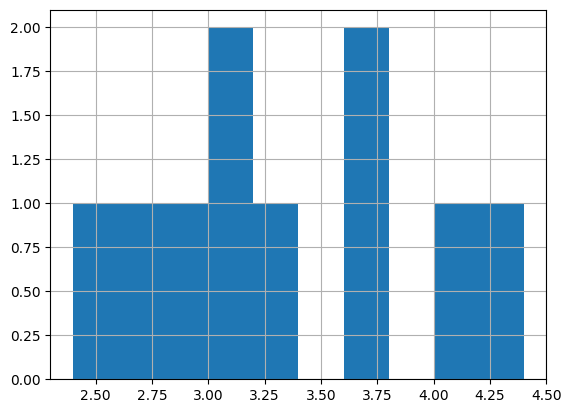

In [ ]:
plt.hist(sample_means)
plt.grid(True)
plt.show()

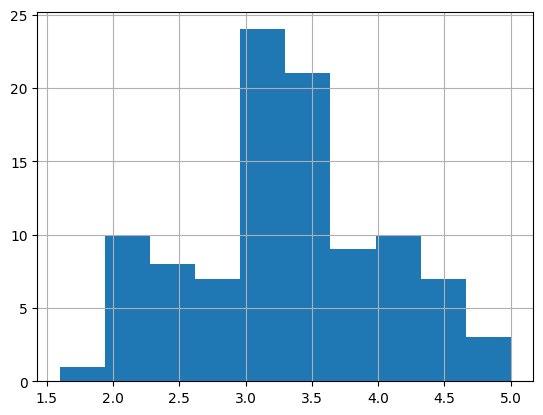

In [ ]:
sample_means = []
for i in range(100):
    sample_means.append(np.mean(die.sample(5, replace=True)))
plt.hist(sample_means)
plt.grid(True)
plt.show()

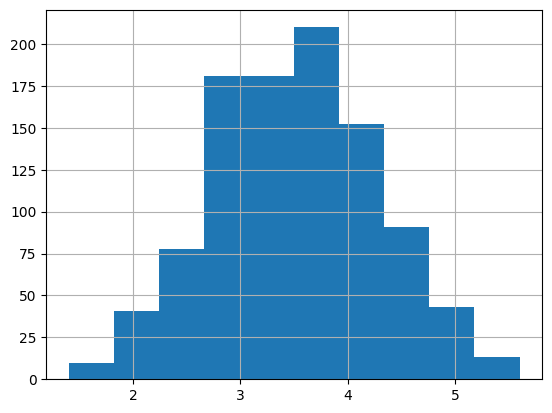

In [ ]:
sample_means = []
for i in range(1000):
    sample_means.append(np.mean(die.sample(5, replace=True)))

plt.hist(sample_means)
plt.grid(True)
plt.show()

The distribution <u>approaches normal distribution</u> even though the distribution of the dice rolling is discrete uniform.

## **Sampling distribution of the sample standard deviations**

* This also follows CLT

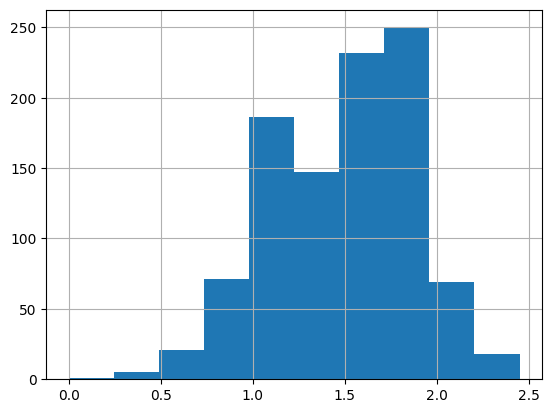

In [ ]:
sample_sds = []
for i in range(1000):
    sample_sds.append(np.std(die.sample(5, replace=True)))

plt.hist(sample_sds)
plt.grid(True)
plt.show()

## **Proportions and the CLT**

* Even some simple proportions also follow CLT !

In [ ]:
sales_team = pd.Series(["Amir", "Brian", "Claire", "Damian"])
sales_team.sample(10, replace=True).values

array(['Damian', 'Claire', 'Amir', 'Amir', 'Damian', 'Damian', 'Brian',
       'Amir', 'Amir', 'Damian'], dtype=object)

In [ ]:
list(sales_team.sample(10, replace=True).values).count('Claire')

1

In [ ]:
print(sales_team.sample(10, replace=True).values)
list(sales_team.sample(10, replace=True).values).count('Claire')

['Damian' 'Claire' 'Claire' 'Brian' 'Amir' 'Brian' 'Damian' 'Brian' 'Amir'
 'Brian']


3

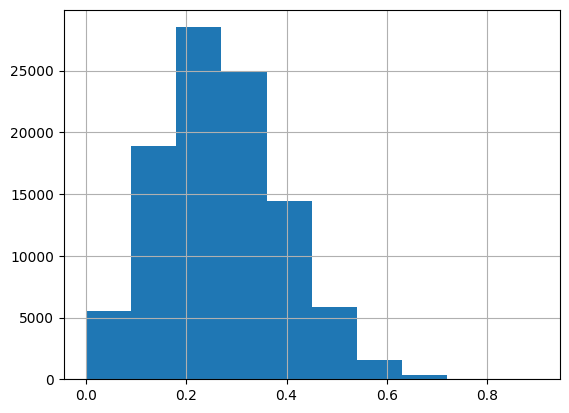

In [ ]:
sample_proportions = [list(sales_team.sample(10, replace=True).values).count('Claire')/10 for i in range(100000)]
plt.hist(sample_proportions)
plt.grid(True)
plt.show()



# **Mean of Sampling Distribution**

In [ ]:
# This is very close to theoretical mean of rolling die.
print(np.mean(sample_means))

3.5036


In [ ]:
np.mean(sample_proportions)

0.24948000000000004

# **Cheat Code!**

* Collect just small samples
* Create sampling distribution to estimate the mean or std



# ***Central Limit Theorem***

The sampling distribution of a statistic becomes closer to the normal distribution as the number of trials increase.

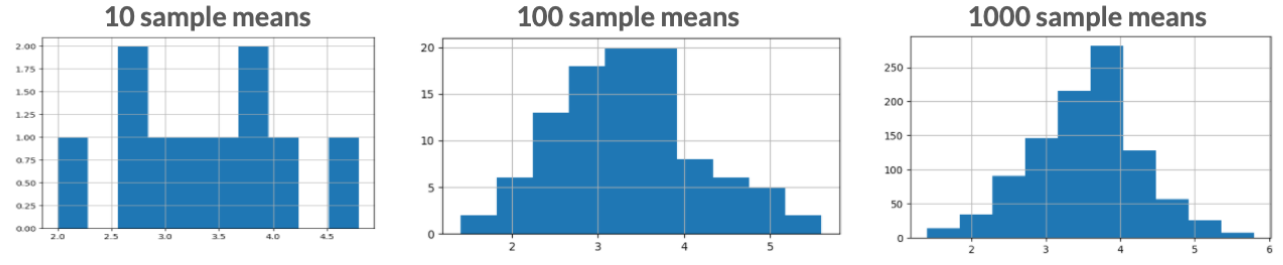

Examine the `num_users` column of `amir_deals` more closely, which contains the number of people who intend to use the product Amir is selling.

* Create a histogram of the `num_users` column of `amir_deals` and show the plot.

* Set the seed to `104`.

* Take a sample of size `20` with replacement from the `num_users` column of `amir_deals`, and take the mean.

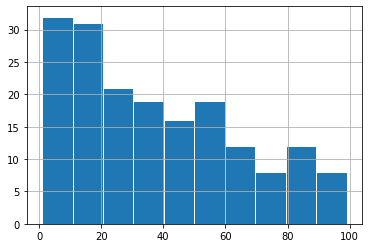

32.0


In [ ]:
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

amir_deals = pd.read_csv('amir_deals.csv').drop(columns='Unnamed: 0')

# Create a histogram of num_users and show
amir_deals['num_users'].hist(edgecolor='white')
plt.show()

# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20, replace=True)

# Take mean of samp_20
print(np.mean(samp_20))

* Repeat this 100 times using a `for` loop and store as `sample_means`. This will take 100 different samples and calculate the mean of each.
* Convert `sample_means` into a `pd.Series`, create a histogram of the `sample_means`, and show the plot.

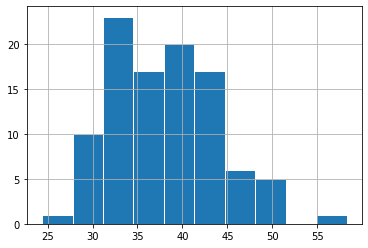

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

amir_deals = pd.read_csv('amir_deals.csv').drop(columns='Unnamed: 0')

# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(100):
    # Take sample of 20 num_users
    samp_20 = amir_deals['num_users'].sample(20, replace=True)
    # Calculate mean of samp_20
    samp_20_mean = np.mean(samp_20)
    # Append samp_20_mean to sample_means
    sample_means.append(samp_20_mean)

# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist(edgecolor='white')
plt.show()

You've just seen the central limit thorem at work. Even though the distribution of `num_users` is not normal, the distribution of its sample means resembles the normal distribution.

### ***The mean of means*** (ขี้เกียจสร้างไฟล์ all_deals)

You want to know what the average number of users (`num_users`) is per deal, but you want to know this number for the entire company so that you can see if Amir's deals have more or fewer users than the company's average deal. The problem is that over the past year, the company has worked on more than ten thousand deals, so it's not realistic to compile all the data. Instead, you'll estimate the mean by taking several random samples of deals, since this is much easier than collecting data from everyone in the company.

* Set the random seed to `321`.

* Take 30 samples (with replacement) of size 20 from `all_deals['num_users']` and take the mean of each sample. Store the sample means in `sample_means`.
* Print the mean of `sample_means`.
* Print the mean of the `num_users` column of `amir_deals`.

In [ ]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = all_deals['num_users'].sample(20, replace=True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(np.mean(amir_deals['num_users']))

```
<script.py> output:
    38.31333333333332
    37.651685393258425
```
Amir's average number of users is very close to the overall average.

# **Poisson Distribution**

* Events appear to happen at a certain rate,
but completely at random

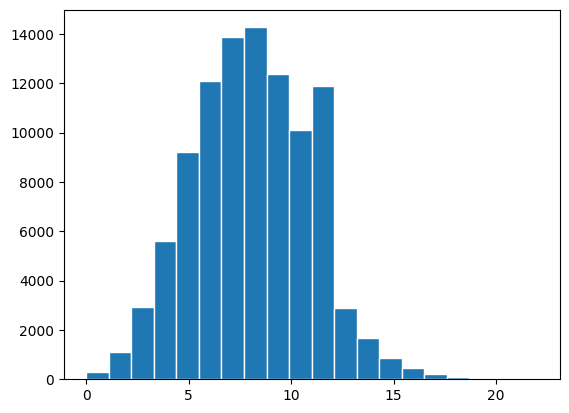

In [ ]:
from scipy.stats import poisson

plt.hist(poisson.rvs(8, size=100000), edgecolor='white', bins=20)
plt.show()

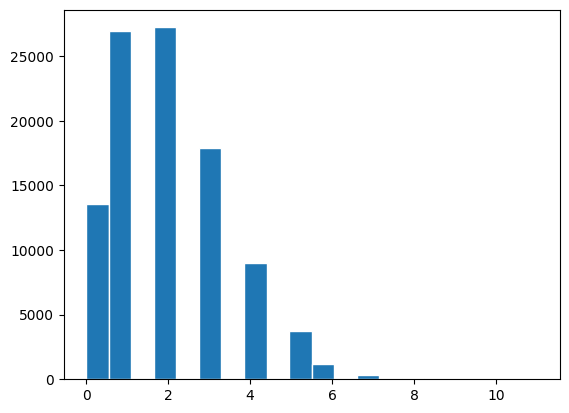

In [ ]:
plt.hist(poisson.rvs(2, size=100000), edgecolor='white', bins=20)
plt.show()



# ***Probability of a single value in Poisson Distribution***

$$Prob(X = x) = \frac{\lambda^x}{x!} e^{-\lambda}$$

In [ ]:
from math import exp, factorial
from scipy.stats import poisson

print(poisson.pmf(5, 8))
(8**5)*exp(-8)/factorial(5)

0.09160366159257921


0.09160366159257924

# ***Probability of less than or equal to in Poisson Distribution***

In [ ]:
from scipy.stats import poisson
print(poisson.cdf(5, 8))
print(poisson.pmf(0, 8) + poisson.pmf(1, 8) + poisson.pmf(2, 8) + poisson.pmf(3, 8) + poisson.pmf(4, 8) + poisson.pmf(5, 8))

0.19123606207962532
0.19123606207962518


# ***Sampling from a Poisson distribution***

In [ ]:
from scipy.stats import poisson
poisson.rvs(8, size=10)

array([ 7,  7, 10, 11,  8,  5, 13, 11,  7,  7])

# ***The CLT still applies!***

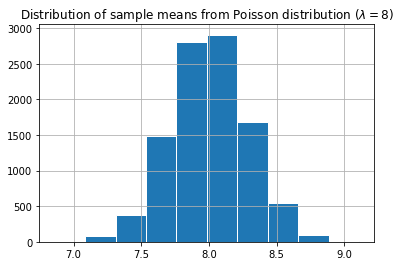

In [ ]:
from scipy.stats import poisson
import matplotlib.pyplot as plt

pmean = []
for i in range(10000):
    m = poisson.rvs(8, size=100)
    pmean.append(np.mean(m))

plt.hist(pmean, edgecolor='white')
plt.grid()
plt.title(r'Distribution of sample means from Poisson distribution ($\lambda = 8$)')
plt.show()

### ***Tracking lead responses***

Your company uses sales software to keep track of new sales leads. It organizes them into a queue so that anyone can follow up on one when they have a bit of free time. Since the number of lead responses is a countable outcome over a period of time, this scenario corresponds to a Poisson distribution. On average, Amir responds to 4 leads each day. In this exercise, you'll calculate probabilities of Amir responding to different numbers of leads.

* Import poisson `from scipy.stats` and calculate the probability that Amir responds to `5` leads in a day, given that he responds to an average of `4`.

* Amir's coworker responds to an average of `5.5` leads per day. What is the probability that she answers `5` leads in a day?

* What's the probability that Amir responds to `2` or fewer leads in a day?

* What's the probability that Amir responds to more than `10` leads in a day?

In [ ]:
from scipy.stats import poisson

prob_5 = poisson.pmf(5, 4)

print(prob_5)

# Probability of 5 responses
prob_coworker = poisson.pmf(5, 5.5)

print(prob_coworker)

# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2, 4)
print(prob_2_or_less)

# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10, 4)
print(prob_over_10)

0.1562934518505317
0.17140068409793663
0.23810330555354436
0.0028397661205137315


Note that if you provide `poisson.pmf()` or `poisson.cdf()` with a non-integer, it throws an error since the Poisson distribution only applies to integers.

# **Exponential Distribution**

$$p(x) = \lambda e^{\left( - \lambda x \right)}$$

## **Probability of time between Poisson events**

* Examples
  - Probability of > 1 day between adoptions
  - Probability of < 10 minutes between restaurant arrivals
  - Probability of 6-8 months between earthquakes

* Rate per time unit = $\lambda$
* Expected value = $\dfrac{1}{\lambda}$

Example: On average, one customer service ticket is created every 2 minutes.

$λ = 0.5$ customer service tickets created each minute.

- Hence, on average one needs to wait for $\frac{1}{\lambda} = 2$ minutes between each ticket.

## How long until a new request is created?

$$P(X < 1) = $$



In [ ]:
from scipy.stats import expon

# (wait < 1 min) =
expon.cdf(1, scale=0.5)

0.8646647167633873

$$P (wait > 3 min) =$$

In [ ]:
1- expon.cdf(3, scale=0.5)

0.0024787521766663767

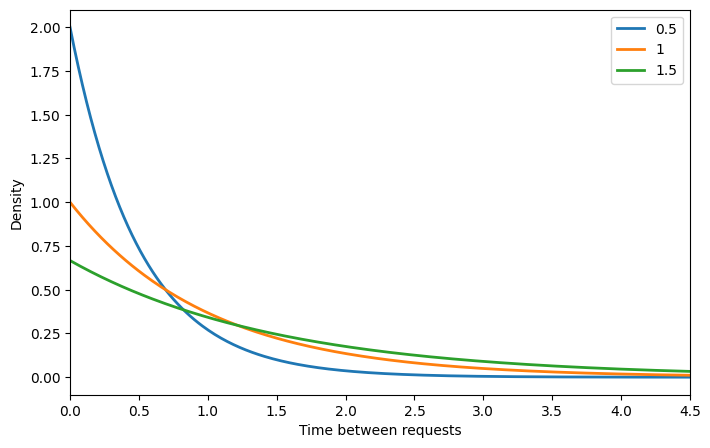

In [ ]:
loc = 0
x = np.linspace(0, 15, 1000)
plt.figure(figsize=(8, 5))
for scale in [0.5, 1, 1.5]:
    pdf = expon.pdf(x, loc=loc, scale=scale)
    plt.plot(x, pdf, lw=2, label=scale)
plt.xlim(0, 4.5)
plt.xlabel('Time between requests')
plt.ylabel('Density')
plt.legend()
plt.show()


# **t-distribution**

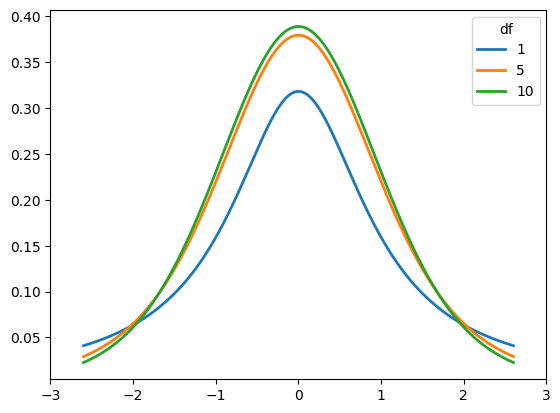

In [ ]:
from scipy.stats import t

x = np.linspace(-2.6, 2.6, 1000)
for df in [1, 5, 10]:
    pdf = t.pdf(x, df)
    plt.plot(x, pdf, lw=2, label=df)
plt.legend(title='df')
plt.xlim(-3, 3)
plt.show()

# **Log-normal distribution**

Variable whose <u>logarithm is normally
distributed</u>, i.e., if $X$ is lognormally distributed, then
 <u>*$\log X$ is normally distributed.*</u>

$$p(x) = \frac{1}{\sigma x \sqrt{2\pi}}\exp \left(- \frac{\left(\log x - \mu\right)^2}{2 \sigma^2} \right)$$


This distribution has two parameters, $\mu$
 and $\sigma$.


It is often used to model income or asset prices.  Generally said that *income is log-normally distributed.*

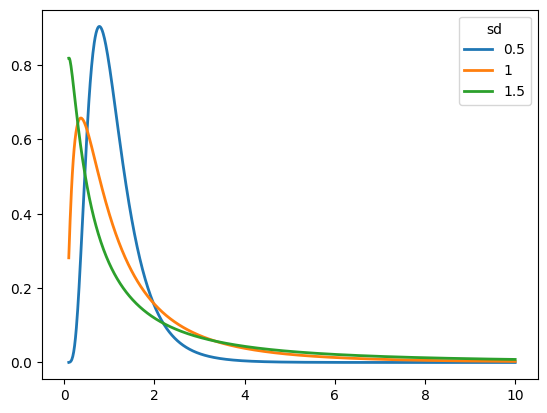

In [ ]:
from scipy.stats import lognorm

x = np.linspace(0.1, 10, 1000)
for s in [0.5, 1, 1.5]:
    pdf = lognorm.pdf(x, s)
    plt.plot(x, pdf, lw=2, label=s)
plt.legend(title='sd')
plt.xlim(-0.5, 10.5)
plt.show()

### ***Modeling time between leads***

To further evaluate Amir's performance, you want to know how much time it takes him to respond to a lead after he opens it. On average, it takes `2.5` hours for him to respond. In this exercise, you'll calculate probabilities of different amounts of time passing between Amir receiving a lead and sending a response.

* Import `expon` `from scipy.stats`. What's the probability it takes Amir less than an hour to respond to a lead?

* What's the probability it takes Amir more than 4 hours to respond to a lead?

* What's the probability it takes Amir 3-4 hours to respond to a lead?

In [ ]:
from scipy.stats import expon

# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))

# Print probability response takes > 4 hours
print(1 - expon.cdf(4, scale=2.5))

# Print probability response takes 3-4 hours
print(expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5))

0.3296799539643607
0.20189651799465536
0.09929769391754684


There's only about a 20% chance it will take Amir more than 4 hours to respond, so he's pretty speedy in his responses.

# **Correlations**

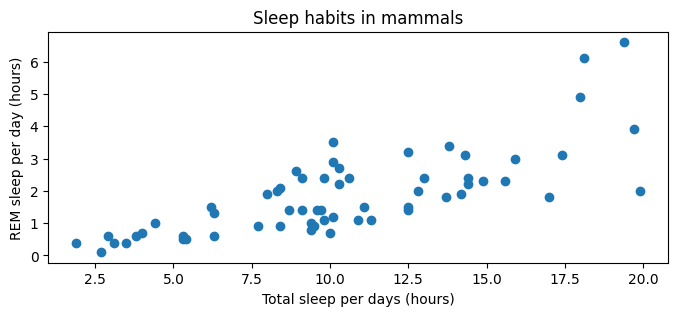

In [ ]:
plt.figure(figsize=(8, 3))
plt.scatter(msleep['sleep_total'], msleep['sleep_rem'])
plt.title('Sleep habits in mammals')
plt.xlabel('Total sleep per days (hours)')
plt.ylabel('REM sleep per day (hours)')
plt.show()

## **Visualizing relationships**

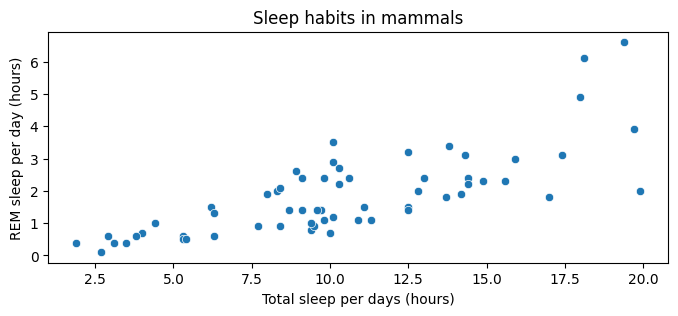

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 3))
sns.scatterplot(x='sleep_total', y='sleep_rem', data=msleep)
plt.title('Sleep habits in mammals')
plt.xlabel('Total sleep per days (hours)')
plt.ylabel('REM sleep per day (hours)')
plt.show()

## **Adding a trend line**

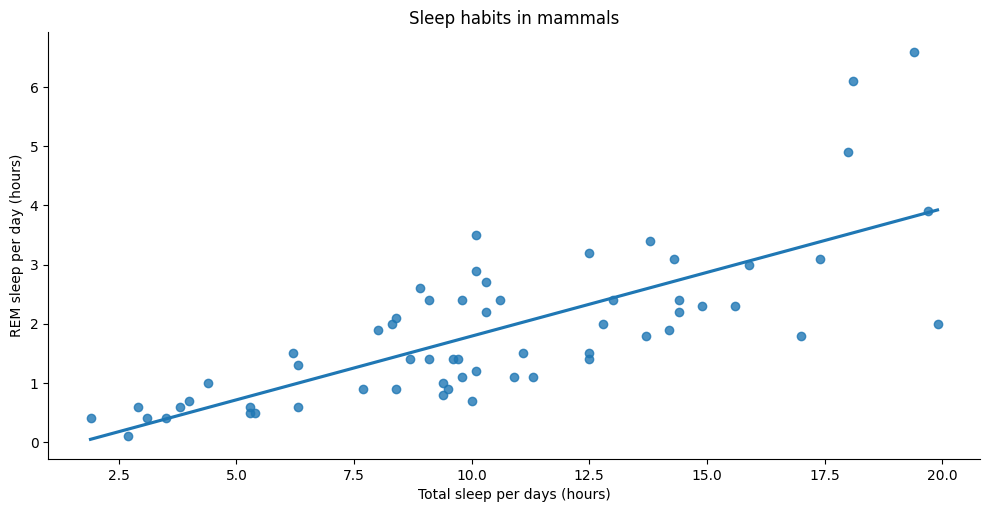

In [ ]:
sns.lmplot(x='sleep_total', y='sleep_rem', data=msleep, ci=None, height=5, aspect=2)
plt.title('Sleep habits in mammals')
plt.xlabel('Total sleep per days (hours)')
plt.ylabel('REM sleep per day (hours)')
plt.show()

## **Computing Correlation**

In [ ]:
msleep['sleep_total'].corr(msleep['sleep_rem'])

0.7517549992287144



### ***Relationships between variables***

In this chapter, you'll be working with a dataset `world_happiness` containing results from the 2019 World Happiness Report. The report scores various countries based on how happy people in that country are. It also ranks each country on various societal aspects such as social support, freedom, corruption, and others. The dataset also includes the GDP per capita and life expectancy for each country.

In this exercise, you'll examine the relationship between a country's life expectancy (`life_exp`) and happiness score (`happiness_score`) both visually and quantitatively.

* Create a scatterplot of `happiness_score` vs. `life_exp` (without a trendline).


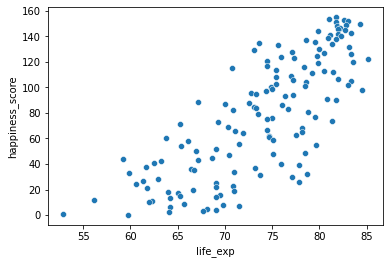

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

world_happiness = pd.read_csv('world_happiness.csv').drop(columns='Unnamed: 0')

# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(y='happiness_score', x='life_exp', data=world_happiness)

# Show plot
plt.show()

* Create a scatterplot of `happiness_score` vs. `life_exp` with a linear trendline.

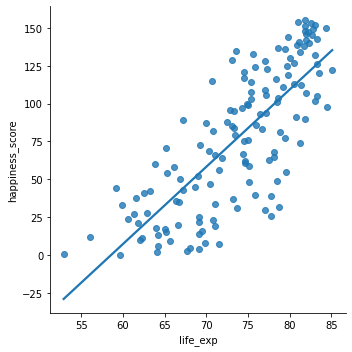

In [ ]:
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)
plt.show()

Calculate the correlation between `life_exp` and `happiness_score`. Save this as cor.

In [ ]:
# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])
print(cor)

0.7802249053272062


# **Correlation Caveats**

## **Non-linear relationships**

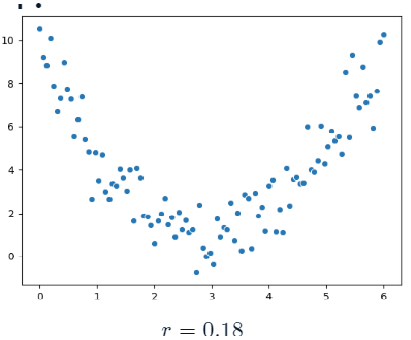

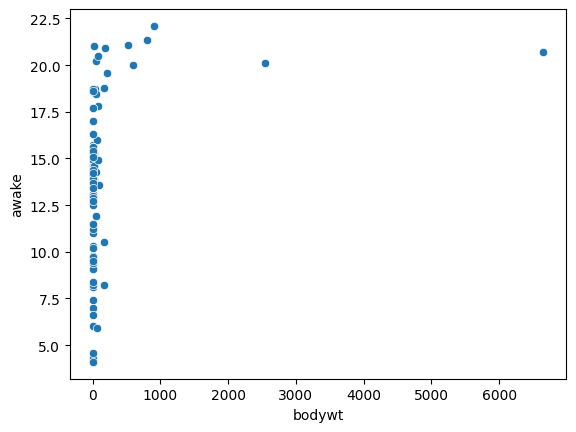

0.31198014973502586


In [ ]:
sns.scatterplot(x='bodywt', y='awake', data=msleep)
plt.show()
print(msleep['bodywt'].corr(msleep['awake']))

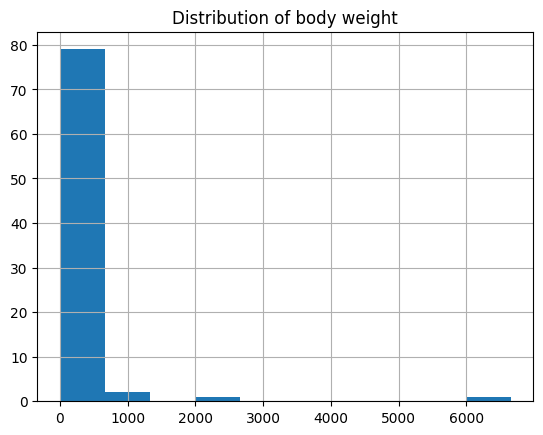

In [ ]:
msleep.hist(column='bodywt')
plt.title('Distribution of body weight')
plt.show()

Too many lower weights and only few high weights.  $⟶$ This should require log transformation.

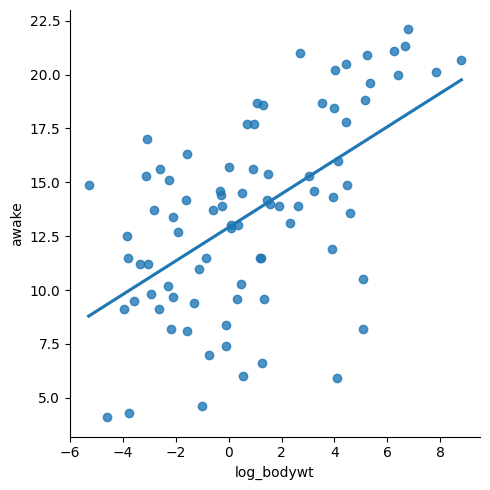



Correlation of log body weight and awake time is 0.57.


In [ ]:
msleep['log_bodywt'] = np.log(msleep['bodywt'])

sns.lmplot(x='log_bodywt', y='awake', data=msleep, ci=None)
plt.show()

print("\n")
print(f'Correlation of log body weight and awake time is {msleep["log_bodywt"].corr(msleep["awake"]):.2f}.')

## **Other transformations**

* log
* square root
* reciprocal
* combinations e.g. log x and log y, or sqrt(x) and 1/y.

# **CORRELATION DOES NOT IMPLY CAUSATION!!!**

## **Confounders (Lurking variables)**

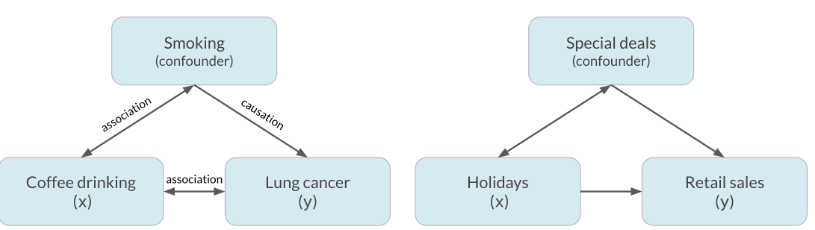

# ***Always plot relationship since correlation can capture only linear relationship!***

### ***What can't correlation measure?***

While the correlation coefficient is a convenient way to quantify the strength of a relationship between two variables, it's far from perfect. In this exercise, you'll explore one of the caveats of the correlation coefficient by examining the relationship between a country's GDP per capita (`gdp_per_cap`) and happiness score.

* Create a seaborn `scatterplot` (without a trendline) showing the relationship between `gdp_per_cap` (on the x-axis) and `life_exp` (on the y-axis).

* Calculate the correlation between `gdp_per_cap` and `life_exp` and store as `cor`.

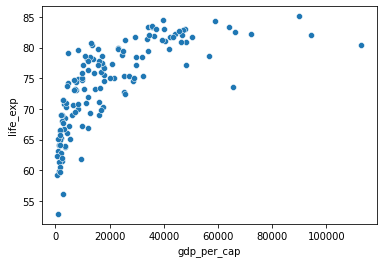

0.7019547642148012


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

world_happiness = pd.read_csv('world_happiness.csv').drop(columns='Unnamed: 0')

# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x='gdp_per_cap', y='life_exp', data=world_happiness)
# Show plot
plt.show()

# Correlation between gdp_per_cap and life_exp
cor = world_happiness['gdp_per_cap'].corr(world_happiness['life_exp'])

print(cor)

* The correlation coefficient can't account for any relationships that aren't linear, regardless of strength.

### ***Transforming variables***

When variables have skewed distributions, they often require a transformation in order to form a linear relationship with another variable so that correlation can be computed. In this exercise, you'll perform a transformation yourself.


* Create a `scatterplot` of `happiness_score` versus `gdp_per_cap` and calculate the correlation between them.

* Add a new column to `world_happiness` called `log_gdp_per_cap` that contains the log of `gdp_per_cap`.

* Create a seaborn `scatterplot` of `log_gdp_per_cap` and `happiness_score` and calculate the correlation between them.

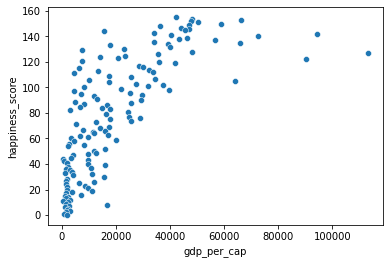

0.727973301222298


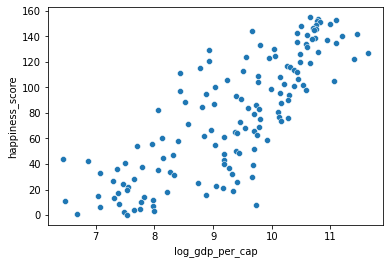

0.8043146004918288


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

world_happiness = pd.read_csv('world_happiness.csv').drop(columns='Unnamed: 0')

# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(y='happiness_score', x='gdp_per_cap', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['happiness_score'].corr(world_happiness['gdp_per_cap'])
print(cor)

# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatterplot of log_gdp_per_cap and happiness_score
sns.scatterplot(x='log_gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

The relationship between GDP per capita and happiness became more linear by applying a log transformation. ***Log transformations are great to use on variables with a skewed distribution***, such as GDP.

### ***Does sugar improve happiness?*** (ขี้เกียจทำ data)

A new column has been added to `world_happiness` called `grams_sugar_per_day`, which contains the average amount of sugar eaten per person per day in each country. In this exercise, you'll examine the effect of a country's average sugar consumption on its happiness score.

* Create a seaborn `scatterplot` showing the relationship between `grams_sugar_per_day` (on the x-axis) and `happiness_score` (on the y-axis).

*  Calculate the correlation between `grams_sugar_per_day` and `happiness_score`.

In [ ]:
sns.scatterplot(x='grams_sugar_per_day', y='happiness_score', data=world_happiness)
plt.show()

# Correlation between grams_sugar_per_day and happiness_score
cor = world_happiness['grams_sugar_per_day'].corr(world_happiness['happiness_score'])
print(cor)

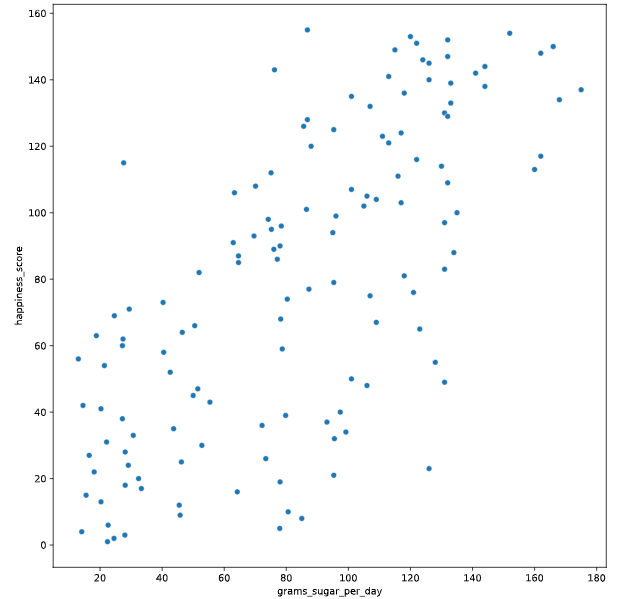

If correlation always implied that one thing causes another, people may do some nonsensical things, like eat more sugar to be happier.

### **Confounders**

A study is investigating the relationship between neighborhood residence and lung capacity. Researchers measure the lung capacity of thirty people from neighborhood A, which is located near a highway, and thirty people from neighborhood B, which is not near a highway. Both groups have similar smoking habits and a similar gender breakdown.

Which of the following could be a confounder in this study?

Considering relationship between `neighborhood` and `lung capacity`, so these two are not confounders.

`Smoking habits` and `genders` are similar so they are not confounders.

Anything else such as `air pollution` in the neighborhood situated near the highway can cause lower lung capacity.  This is a counfounder.

